In [ ]:
# making sure keras will work with gpu
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7865793099751993685
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11540815064058083385
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras import regularizers
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.models import Sequential
from keras.utils import to_categorical
from keras import datasets, models, layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Conv2D

In [ ]:
def prepare_data():
    #split dataset to 80% train data and 20% test data
    # validation set will later be extracted from training data in fitting the model
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
    print('X_train shape: ', X_train.shape)
    print('y_train shape: ', y_train.shape)
    print('X_test shape: ', X_test.shape)
    print('y_test shape: ', y_test.shape)

    # one hot encode target values
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    # convert from integers to floats
    train_norm = X_train.astype('float32')
    test_norm = X_test.astype('float32')
    # normalize to range 0-1
    X_train_norm = train_norm / 255.0
    X_test_norm = test_norm / 255.0
    return X_train_norm, y_train, X_test_norm, y_test

In [ ]:
# Creating a sequential model and adding layers to it
def create_model1():
    num_classes = 10
  
    model = Sequential()
    # feature extraction -> 3 layer VGG like archtecture
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.5))

    # classification part of the model
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax')) 
    
    return model

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.figure(figsize=(8,10))
    plt.subplot(2,1,1)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='darkblue', label='train')
    plt.plot(history.history['val_accuracy'], color='lightblue', label='test')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    # plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)
    # plot accuracy
    plt.subplot(2,1,2)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='darkblue', label='train')
    plt.plot(history.history['val_loss'], color='lightblue', label='test')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

In [ ]:
# collect dataset preprocessed values
X_train, y_train, X_test, y_test = prepare_data()

model1 = create_model1()
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
# fit model
history = model1.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.1, callbacks=[callback])

170498071/170498071 [==============================] - 9s 0us/step
X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)
Epoch 1/100
704/704 [==============================] - 19s 14ms/step - loss: 1.7641 - accuracy: 0.3985 - val_loss: 1.3633 - val_accuracy: 0.4948
Epoch 2/100
704/704 [==============================] - 9s 13ms/step - loss: 1.2074 - accuracy: 0.5683 - val_loss: 1.2159 - val_accuracy: 0.5780
Epoch 3/100
704/704 [==============================] - 7s 10ms/step - loss: 1.0333 - accuracy: 0.6355 - val_loss: 0.8526 - val_accuracy: 0.7050
Epoch 4/100
704/704 [==============================] - 8s 11ms/step - loss: 0.9256 - accuracy: 0.6751 - val_loss: 0.8088 - val_accuracy: 0.7196
Epoch 5/100
704/704 [==============================] - 9s 13ms/step - loss: 0.8444 - accuracy: 0.7042 - val_loss: 0.7414 - val_accuracy: 0.7420
Epoch 6/100
704/704 [==============================] - 7s 10ms/step - loss: 0.7894 - accur

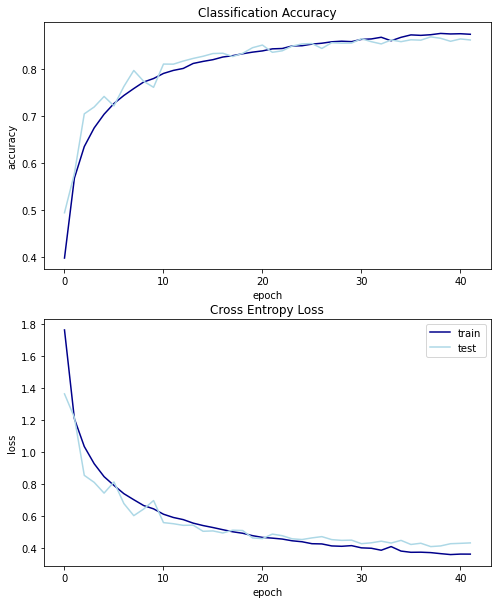

In [ ]:
summarize_diagnostics(history)

313/313 [==============================] - 1s 4ms/step


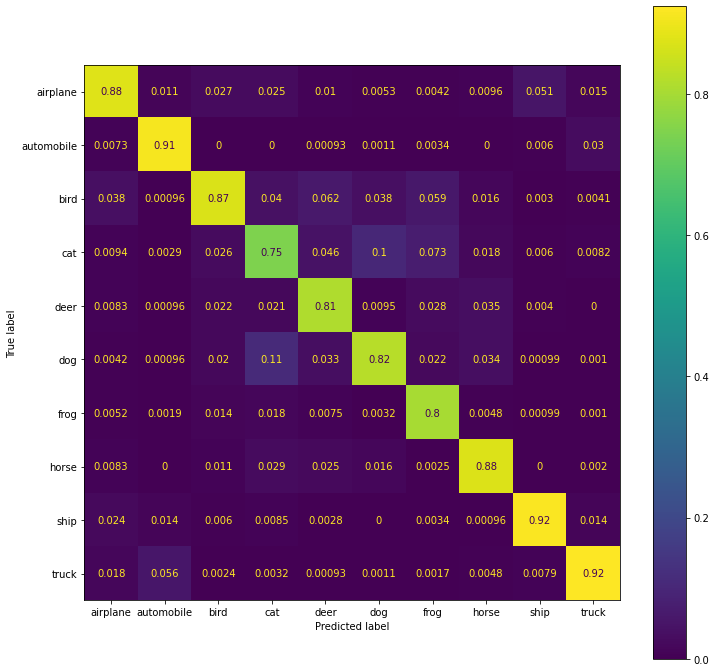

In [ ]:
y_prediction = model1.predict(X_test)
y_prediction = np.argmax (y_prediction, axis = 1)
# y_test=np.argmax(y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
conf_matrix = confusion_matrix(y_test, y_prediction , normalize='pred')
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = class_names)
fig, ax = plt.subplots(figsize=(12,12))
cm_display.plot(ax=ax)

In [ ]:
model1.save('/Q6_model.h5')  